# COSMOS image generation tutorial

## Setup

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import os
import sys

import btk
import btk.plot_utils
import btk.survey
import btk.draw_blends
import btk.catalog
import btk.sampling_functions
import astropy.table

# Here we use a small sample of the real COSMOS catalog; feel free to fill in the correct path
# if you have the complete catalog on your computer
COSMOS_CATALOG_PATHS = [
    "../data/cosmos/real_galaxy_catalog_23.5_example.fits",
    "../data/cosmos/real_galaxy_catalog_23.5_example_fits.fits",
]


## Drawing blends

We assume that you have already gone over the "intro" tutorial. You will find that generating images with COSMOS is very similar to generating images with Catsim. Let's start with the catalog and sampling function.

In [2]:
stamp_size = 24.0
batch_size = 8
catalog = btk.catalog.CosmosCatalog.from_file(COSMOS_CATALOG_PATHS)
sampling_function = btk.sampling_functions.DefaultSampling(stamp_size=stamp_size)
survey = btk.survey.get_surveys("Rubin")

We can now create the corresponding instance of DrawBlendsGenerator. There is an important caveat here: as in the other tutorial, we use the Rubin survey. However, the COSMOS catalog only contains images from the f814w band; thus, when simulating images, the same magnitude is used to compute the galaxy fluxes across all bands.

There is one way to circumvent this limitation in BTK: by providing a custom COSMOS catalog containing multiband magnitude information, one can compute more realistic source fluxes in each band. Such COSMOS catalogs containing multiband magnitudes for the HSC survey are available in the repository at "../data/cosmos" as "real_galaxy_catalog_26_extension_example.fits" and "real_galaxy_catalog_26_extension_example_fits.fits". Feel free to check the documentation for more information about COSMOS catalogs.

In [3]:
gal_type = "parametric" # to choose between real and parametric models
draw_generator = btk.draw_blends.CosmosGenerator(
        catalog,
        sampling_function,
        survey,
        batch_size=batch_size,
        stamp_size=stamp_size,
        cpus=1,
        add_noise=True,
        verbose=False,
        gal_type=gal_type,
    )

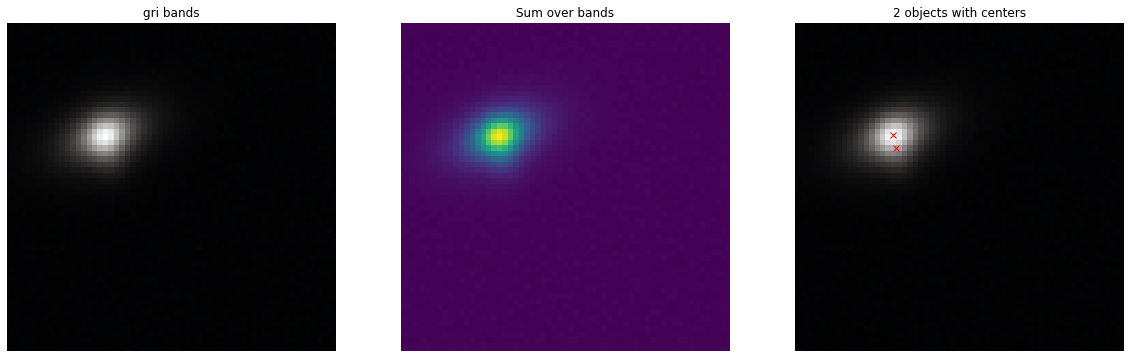

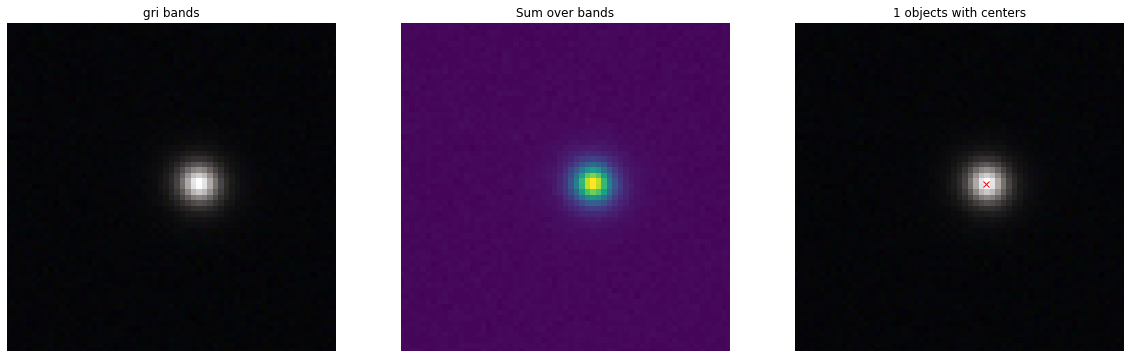

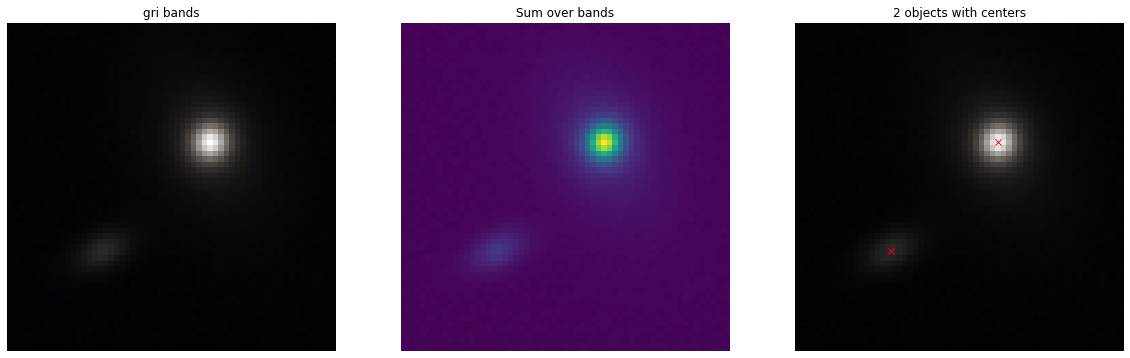

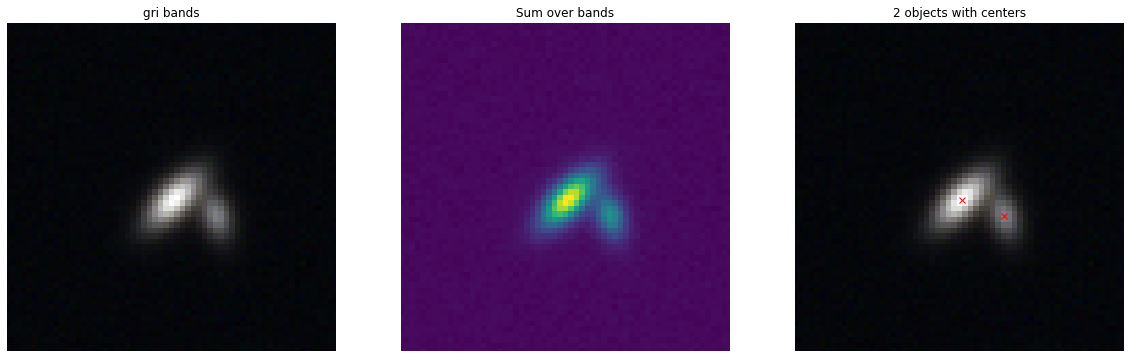

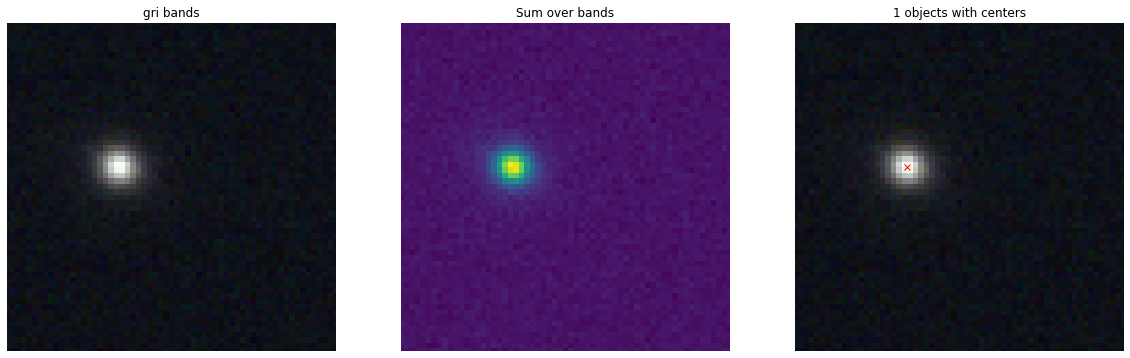

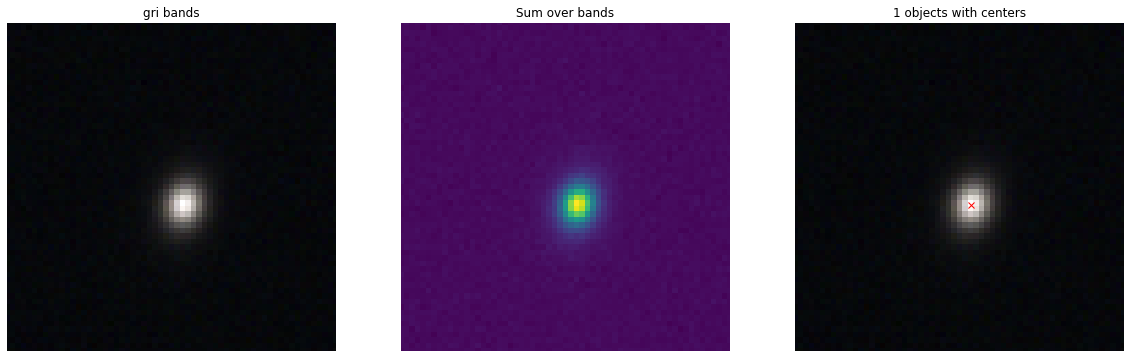

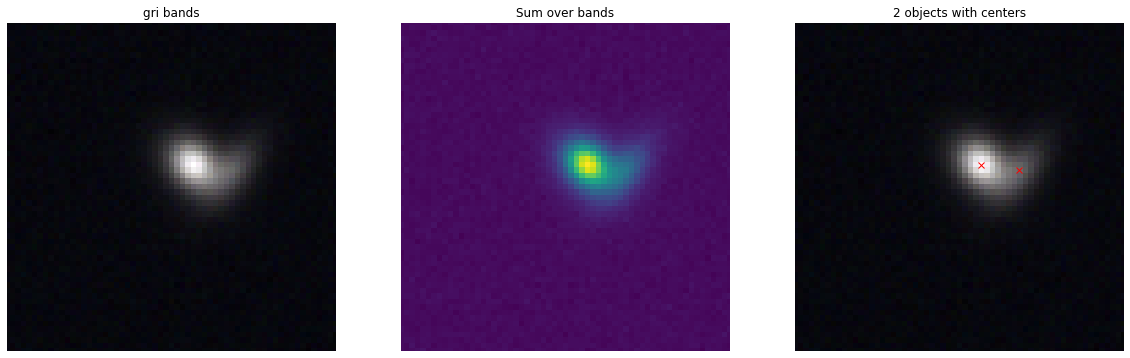

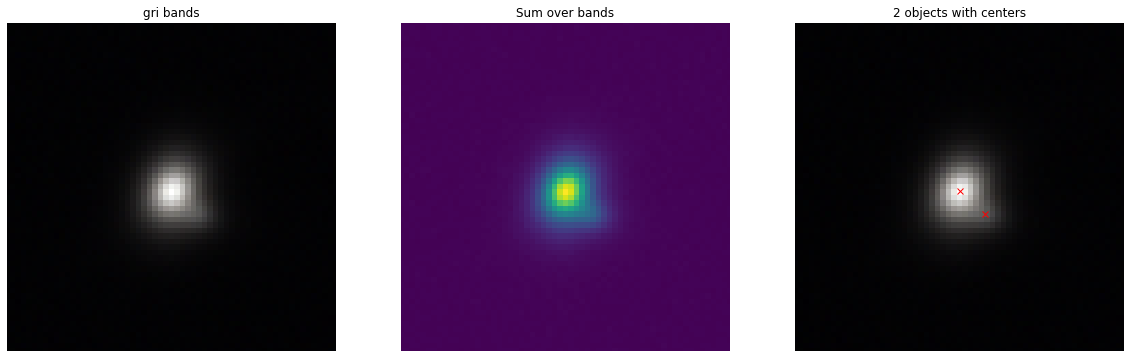

In [4]:
batch = next(draw_generator)
blend_images = batch['blend_images']
blend_list = batch['blend_list']
btk.plot_utils.plot_blends(blend_images, blend_list, limits=(30,90))